# <u>Preprocesamiento y revisión de variables</u>

## Funnel de Modelamiento


## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [2]:
seed = 2021

### 1. Lectura de base

In [3]:
data_creditos = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\base de datos\loan_prediction.csv')

`head` `shape` `type`

In [4]:
data_creditos.head() #muestra los 5 primeros datos

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data_creditos.shape #cantidad de filas y columnas

(614, 13)

Definimos 2 columnas relevantes, el id y el target, que en nuestro caso son las siguientes variables:

In [6]:
id_columns = 'Loan_ID'
target = 'Loan_Status' #variable objetivo

La variable target es binaria de tipo texto, mejor lo cambiamos a numérico:

In [7]:
data_creditos[target].value_counts() #se observa que la variable objetivo se encuentra desbalanceada

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
data_creditos[target] = data_creditos[target].map({'Y': 0, 'N': 1}) #convertir los valores de a numero 0 ,

In [9]:
data_creditos[target].value_counts() #se observa que la variable objetivo se encuentra desbalanceada


Loan_Status
0    422
1    192
Name: count, dtype: int64

In [10]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


Veamos algunas características de nuestra variable target:

In [11]:
data_creditos[target].value_counts(normalize = True)

Loan_Status
0    0.687296
1    0.312704
Name: proportion, dtype: float64

Se puede observar que los valores 0 conrrespoden al 68% de los datos, mientras que los valores 1 corresponden al 31%, se encuentran desbalanceados

In [12]:
data_creditos[target].mean()

0.3127035830618892

El id de la tabla no nos va a servir para el entrenamiento de datos, por lo que lo vamos a eliminar el id de los clientes antes de empezar con el tratamiento de datos:

In [13]:
 #se elimina la columna "id_columns" ya que no proporciona informacion provechosa, axis = 1 hace referencia a las colummas
data_creditos = data_creditos.drop(id_columns, axis = 1)

In [14]:
data_creditos.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


### 2.División en conjuntos de entrenamiento y prueba

En esta etapa realizaremos la división bases de entrenamiento (train) y prueba (test).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [15]:
X = data_creditos.drop(target, axis =1)
y = data_creditos[target]

In [16]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [17]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [18]:
X.shape

(614, 11)

In [19]:
y.shape

(614,)

In [20]:
# función para dividir la base en piloto y control
from sklearn.model_selection import train_test_split

In [21]:
seed

2021

In [22]:
# usaremos la división train/test en 80/20. Otro ratio recomendable es 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed) #stratify se recomienda utilizar el muestreo estratificado para garantizar que las frecuencias de clase relativas se conserven aproximadamente en cada train y pliegue de test.

Stratify, no aseguramos que las particiones sean homogeneas, tomando en consideración la variable objetivo

In [23]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [24]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
33,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban
450,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural
168,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban
530,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
169,Male,Yes,2,Graduate,No,8000,0.0,200.0,360.0,1.0,Semiurban


In [25]:
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [26]:
y_train.shape, y_test.shape

((491,), (123,))

In [27]:
# validación de los promedios de la variable target
y.mean(), y_train.mean(), y_test.mean() #


(0.3127035830618892, 0.3136456211812627, 0.3089430894308943)

validar que el promedio de de toda la variable objetivo, sea muy parecida al promedio de y_train y y_test, para validar que hay cierta homogeneidad entre los datos, si los valores son alejados, probar con otra semilla aleatoria hasta que la proporcion sea homogenea

In [28]:
y_train.value_counts()

Loan_Status
0    337
1    154
Name: count, dtype: int64

In [29]:
y_test.value_counts()

Loan_Status
0    85
1    38
Name: count, dtype: int64

### 3.Análisis exploratorio

Revisemos las columnas del conjunto de datos:

In [30]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [31]:
X_train.columns #columnas establecidas

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [32]:
X_train.dtypes #tipos de variables

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 237 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         479 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         478 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     453 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


Veamos los principales estadísticos:

In [34]:
X_train.describe()   # sólo para variables numéricas

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,478.000000,479.000000,453.000000
mean,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,6069.036190,3155.227516,86.137888,64.750910,0.363951
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,5790.000000,2333.000000,166.750000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


El metodo describe nos ayuda a identificar a primera vista si existen valores outliers, sobre todo observando el valore 75% y el malor max, si estan muy alejados, es posible que exitan valore atipicos, lo mismo sucede con el quartil 25% y el valor min, si difieren mucho, es posible la existencia de ouliers

In [35]:
X_train.describe()[1:3] #solo para visualizar las metricas de media y desviación standar

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
mean,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,6069.036190,3155.227516,86.137888,64.750910,0.363951


In [36]:
X_train.describe(include = 'object')   # para datos categoricos

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,479,489,479,491,467,491
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,387,318,276,380,399,185


Si observas variables con muchas categorías (cercana a la cantidad de registros) o 1 sola categoría, descartarlas.

si en la fila de unique solo aparece 1 unico valor, se debe eliminar esa variable categorica ya que no esta aportando variabilidad

In [37]:
X_train['Married'].value_counts(dropna = False) #contar los valores incluido los nulos

Married
Yes    318
No     171
NaN      2
Name: count, dtype: int64

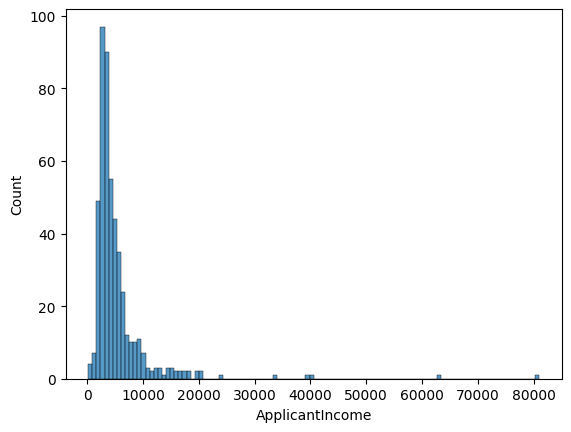

In [38]:
sns.histplot(data = X_train, x = 'ApplicantIncome')
plt.show()

Si los valores atipicos 80000, 63000, 40000, corresponden a una misma registro se debe eliminar

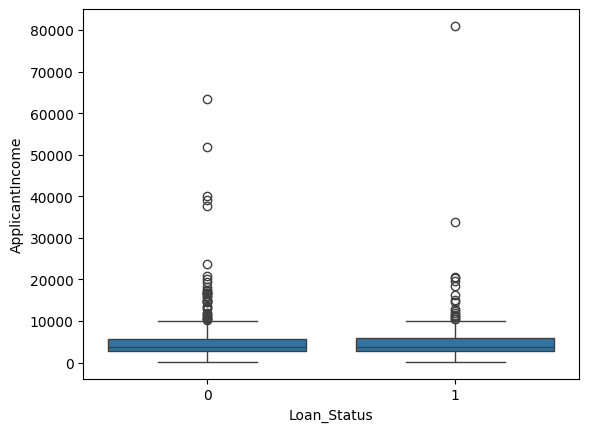

In [39]:
sns.boxplot(data = data_creditos, y = 'ApplicantIncome', x = target)
plt.show()

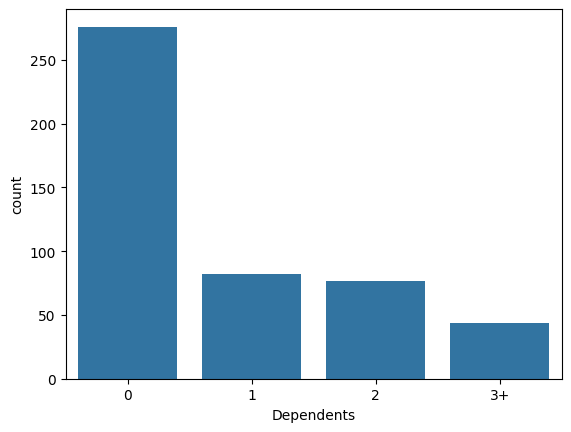

In [40]:
sns.countplot(data = X_train, x = 'Dependents')
plt.show()

In [41]:
X_train.query("Dependents == '3+'").head() #mostrar de la variable Dependents los que tengas valores iguales o mayores que 3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
324,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural
461,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,360.0,1.0,Rural


### 4.Transformación de variables

In [42]:
X_train['Dependents'].value_counts(dropna = False)

Dependents
0      276
1       82
2       77
3+      44
NaN     12
Name: count, dtype: int64

In [43]:
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3} #se almacena los valores en esta variable se van a convertir de str a int
X_train['Dependents'] = X_train['Dependents'].map(mapping)
X_train['Dependents']

237    0.0
300    0.0
498    1.0
0      0.0
311    0.0
      ... 
256    0.0
497    0.0
55     2.0
206    0.0
39     0.0
Name: Dependents, Length: 491, dtype: float64

In [44]:
X_train['Dependents'].value_counts(dropna = False)

Dependents
0.0    276
1.0     82
2.0     77
3.0     44
NaN     12
Name: count, dtype: int64

In [45]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0.0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0.0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0.0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [46]:
X_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,479.000000,491.000000,491.000000,478.000000,479.000000,453.000000
mean,0.768267,5358.511202,1670.942811,146.129707,341.661795,0.843267
std,1.026100,6069.036190,3155.227516,86.137888,64.750910,0.363951
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,2.000000,5790.000000,2333.000000,166.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 237 to 39
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         479 non-null    float64
 3   Education          491 non-null    object 
 4   Self_Employed      467 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         478 non-null    float64
 8   Loan_Amount_Term   479 non-null    float64
 9   Credit_History     453 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 46.0+ KB


### 5.Tratamiento de valores nulos

<img src = 'https://miro.medium.com/max/2816/1*MiJ_HpTbZECYjjF1qepNNQ.png'>

Cantidad de valores nulos por columna

Missigno: https://github.com/ResidentMario/missingno

In [48]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
237,Female,No,0.0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban
300,Male,Yes,0.0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban
498,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
311,Male,No,0.0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban


In [49]:
# instalar missingno
#!pip install missingno

In [50]:
import missingno as msno

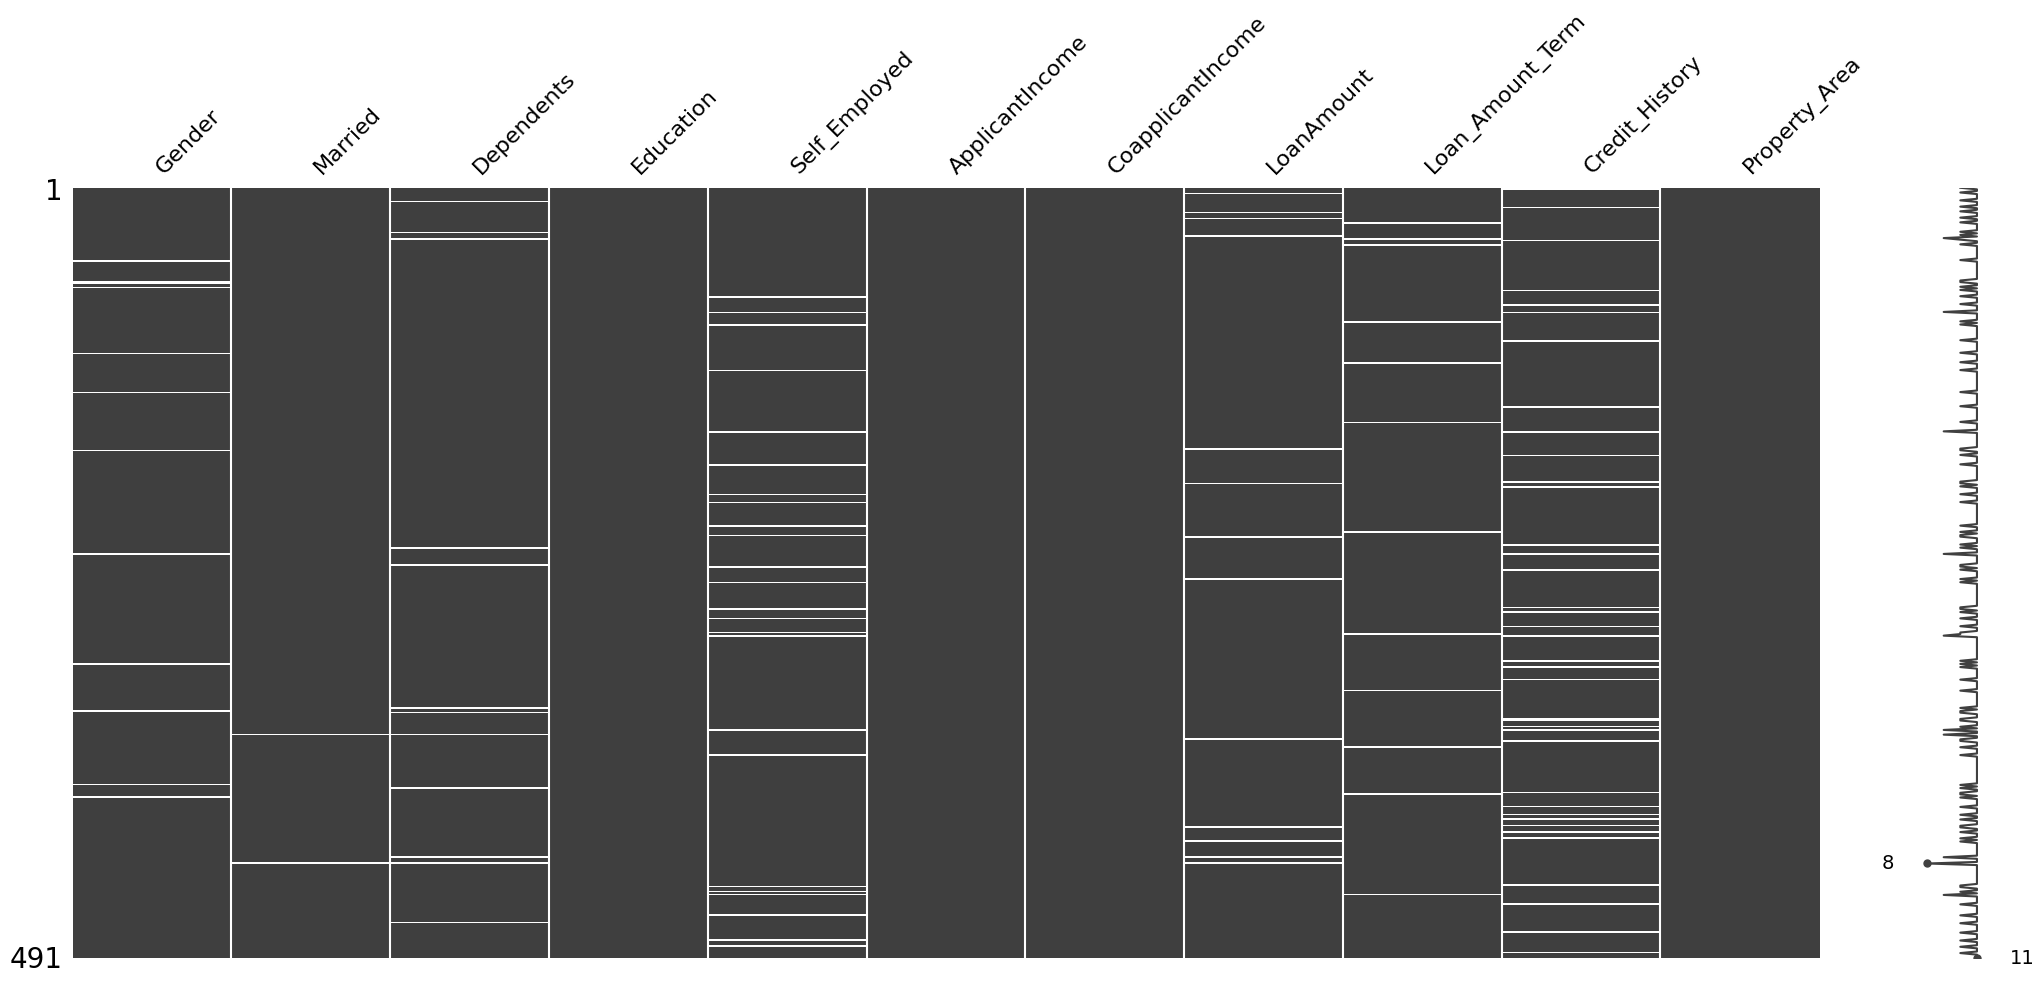

In [51]:
msno.matrix(X_train)
plt.show()

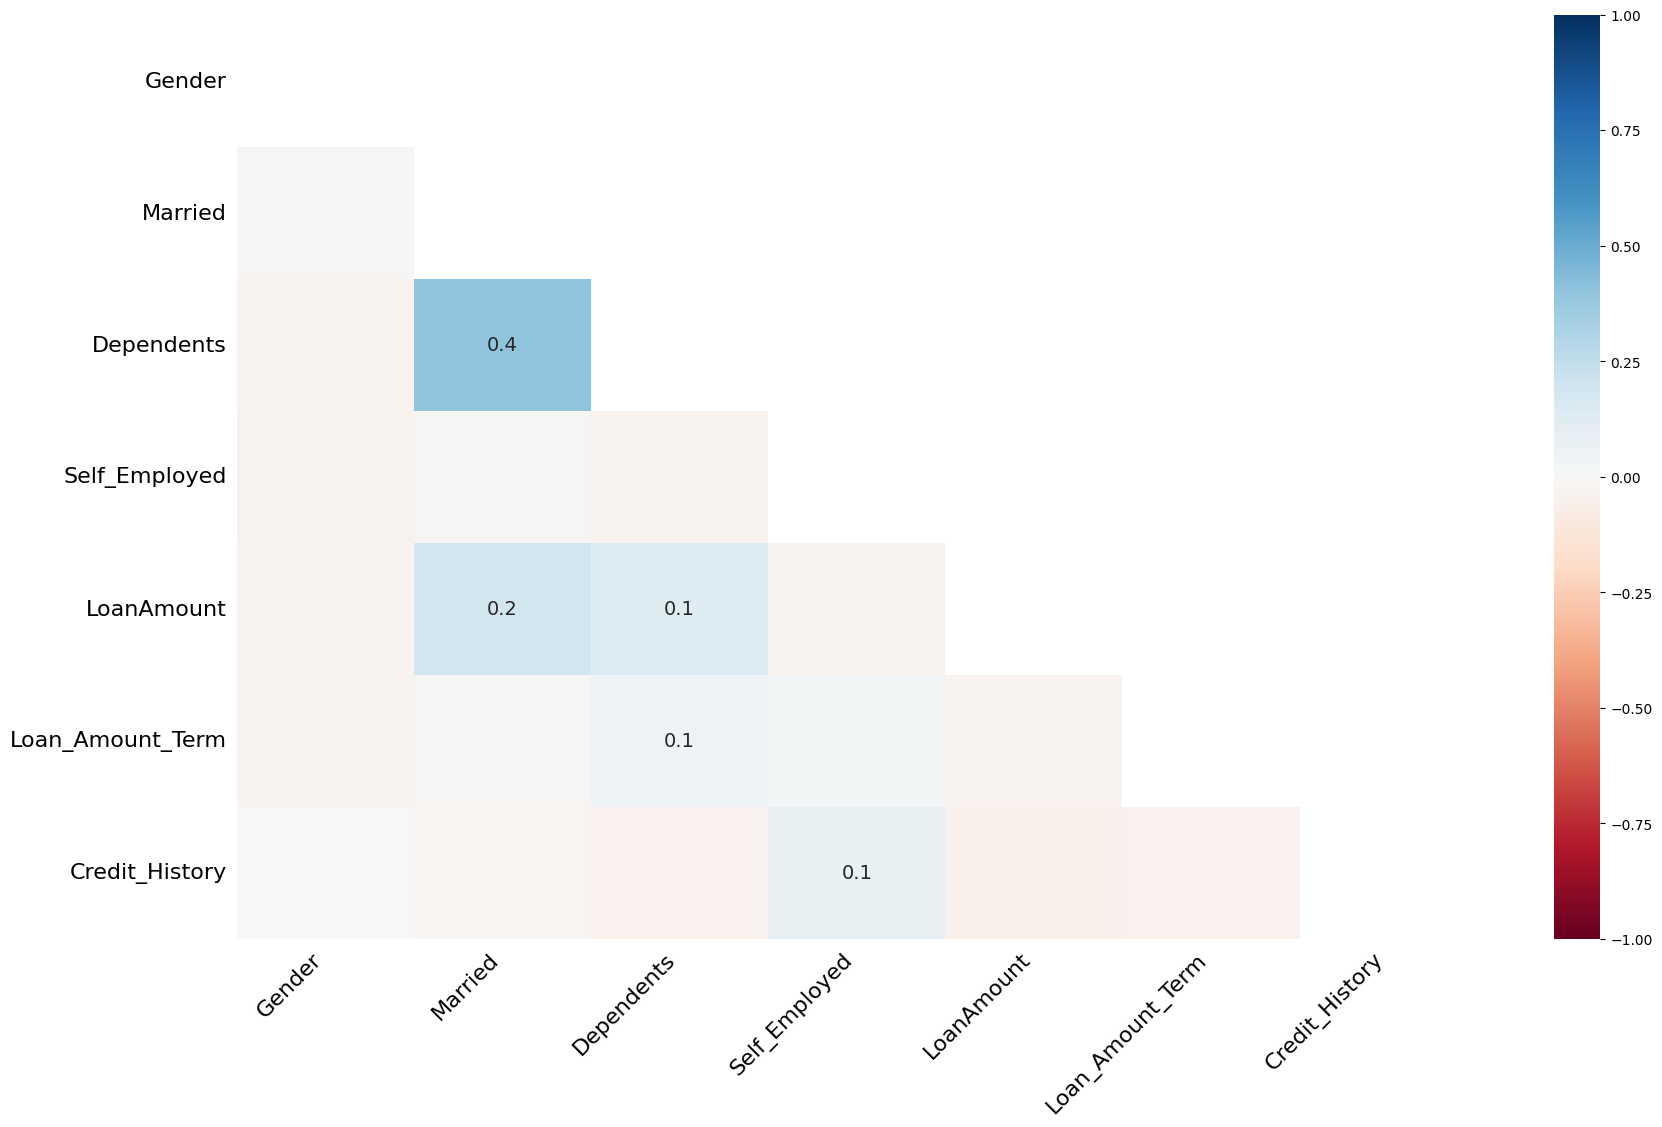

In [52]:
msno.heatmap(X_train) #ver la relacion entre variables que tengan valores nulos en los mismo registros
plt.show()

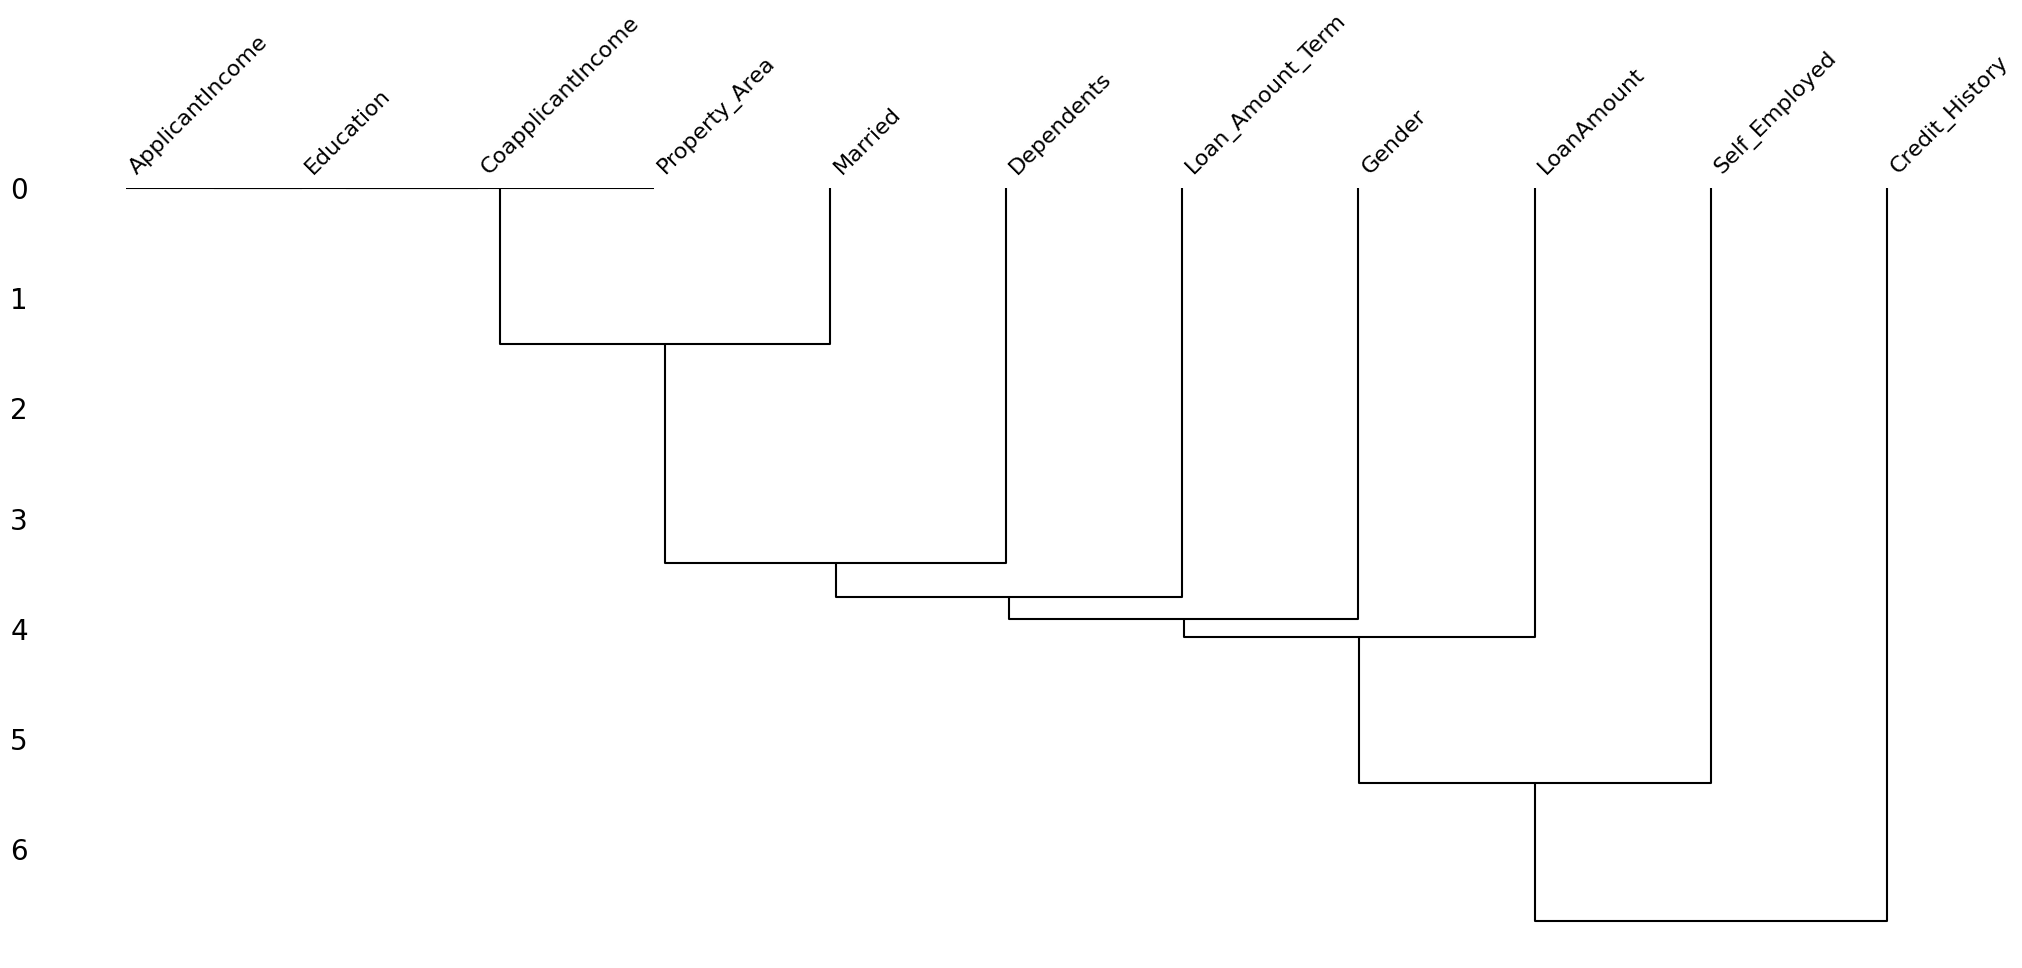

In [53]:
msno.dendrogram(X_train) #relacion entre valores mising entre las variables
plt.show()

<Axes: >

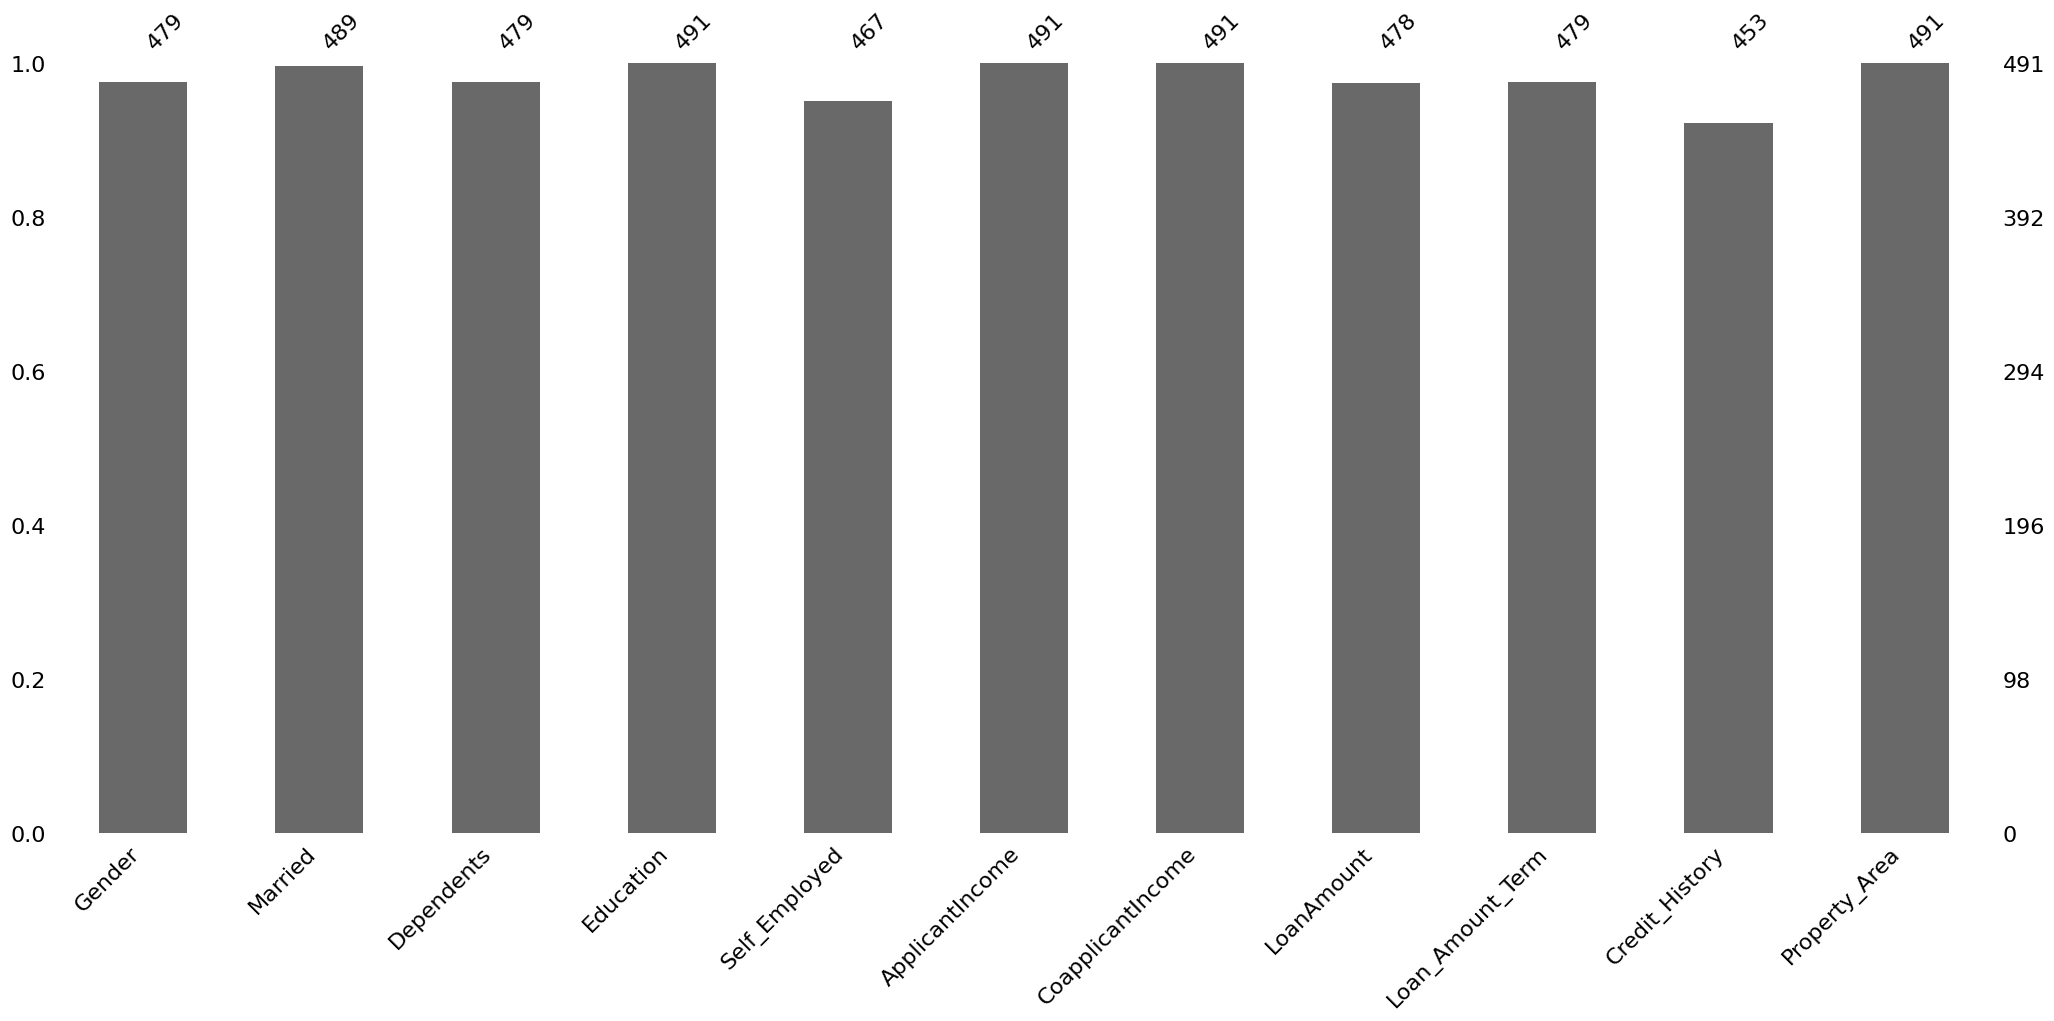

In [54]:
msno.bar(X_train)

In [55]:
X_train.isnull().sum() #contabilizar todos los valores nulos

Gender               12
Married               2
Dependents           12
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           13
Loan_Amount_Term     12
Credit_History       38
Property_Area         0
dtype: int64

In [56]:
# punto de guardado de bases avanzadas

X_train.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_101122.csv', index = False)
X_test.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\test_101122.csv', index = False)

y_train.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\ytrain_101122.csv', index = False)
y_test.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\ytest_101122.csv', index = False)

In [57]:
# extrayendo la data guardada
import pandas as pd

X_train = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_101122.csv')
X_test = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\test_101122.csv')

y_train = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\ytrain_101122.csv')
y_test = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\ytest_101122.csv')

El método de imputación depende de la naturaleza de la variable. Separamos las variables categóricas de las numéricas

In [58]:
X_train_cat = X_train.select_dtypes('object') #almacenar las variables categoricas, se utiliza la moda
X_train_num = X_train.select_dtypes('number') #almacenar las variables numericas, se utiliza la media, mediana, zeros, el valor mas frecuente, o un valor constante

In [59]:
X_train_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban


In [60]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463,0.0,122.0,360.0,NaN
1,0.0,1800,2934.0,93.0,360.0,0.0
2,1.0,2895,0.0,95.0,360.0,1.0
3,0.0,5849,0.0,NaN,360.0,1.0
4,0.0,2927,2405.0,111.0,360.0,1.0


Simple Imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

#### Imputación de numéricas

In [61]:
X_train['Dependents'].mean()

0.7682672233820459

In [62]:
X_train['Dependents'].median()

0.0

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463,0.0,122.0,360.0,NaN
1,0.0,1800,2934.0,93.0,360.0,0.0
2,1.0,2895,0.0,95.0,360.0,1.0
3,0.0,5849,0.0,NaN,360.0,1.0
4,0.0,2927,2405.0,111.0,360.0,1.0


In [65]:
imputer_num = SimpleImputer(strategy = 'median')  #utilizar la mediana
imputer_num

SimpleImputer(strategy='median')

In [66]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

`IMPUTER.statistics_`

In [67]:
imputer_num.statistics_

array([0.000e+00, 3.814e+03, 1.250e+03, 1.260e+02, 3.600e+02, 1.000e+00])

In [68]:
imputer_num.transform(X_train_num)

array([[0.000e+00, 3.463e+03, 0.000e+00, 1.220e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 1.800e+03, 2.934e+03, 9.300e+01, 3.600e+02, 0.000e+00],
       [1.000e+00, 2.895e+03, 0.000e+00, 9.500e+01, 3.600e+02, 1.000e+00],
       ...,
       [2.000e+00, 2.708e+03, 1.167e+03, 9.700e+01, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.244e+03, 0.000e+00, 8.000e+01, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.748e+03, 1.668e+03, 1.100e+02, 3.600e+02, 1.000e+00]])

In [69]:
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns = X_train_num.columns) #volver a crear el dataframe

In [70]:
X_train_num.head() #sin imputar

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463,0.0,122.0,360.0,NaN
1,0.0,1800,2934.0,93.0,360.0,0.0
2,1.0,2895,0.0,95.0,360.0,1.0
3,0.0,5849,0.0,NaN,360.0,1.0
4,0.0,2927,2405.0,111.0,360.0,1.0


In [71]:
X_train_num_imputed.head() #imputado

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463.0,0.0,122.0,360.0,1.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0
2,1.0,2895.0,0.0,95.0,360.0,1.0
3,0.0,5849.0,0.0,126.0,360.0,1.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0


In [72]:
X_train_num.isnull().sum()

Dependents           12
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           13
Loan_Amount_Term     12
Credit_History       38
dtype: int64

In [73]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

#### Imputación de categóricas

In [74]:
imputer_cat = SimpleImputer(strategy='most_frequent') #aplicar el modo mas frecuente (la moda)
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

In [75]:
X_train_cat.head(70)

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban
...,...,...,...,...,...
65,Male,Yes,Not Graduate,No,Rural
66,Male,No,Graduate,No,Urban
67,Male,Yes,Graduate,No,Urban
68,Male,Yes,Graduate,No,Semiurban


In [76]:
X_train_cat_imputed.head(70)

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban
...,...,...,...,...,...
65,Male,Yes,Not Graduate,No,Rural
66,Male,No,Graduate,No,Urban
67,Male,Yes,Graduate,No,Urban
68,Male,Yes,Graduate,No,Semiurban


In [77]:
imputer_cat.statistics_

array(['Male', 'Yes', 'Graduate', 'No', 'Semiurban'], dtype=object)

In [78]:
X_train_cat.isnull().sum()

Gender           12
Married           2
Education         0
Self_Employed    24
Property_Area     0
dtype: int64

In [79]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

Ya no tenemos valores nulos!

#### Utilizar el módulo sklearn.impute para llenar valores nulos (KNNImputer)

In [80]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3) #que se agrupe con los 3 vecinos mas cercanos

In [81]:
# TODO: imputar las variables numéricas con KNN Imputer - interpretar los resultados

knn.fit_transform(X_train_num)

array([[0.000e+00, 3.463e+03, 0.000e+00, 1.220e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 1.800e+03, 2.934e+03, 9.300e+01, 3.600e+02, 0.000e+00],
       [1.000e+00, 2.895e+03, 0.000e+00, 9.500e+01, 3.600e+02, 1.000e+00],
       ...,
       [2.000e+00, 2.708e+03, 1.167e+03, 9.700e+01, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.244e+03, 0.000e+00, 8.000e+01, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.748e+03, 1.668e+03, 1.100e+02, 3.600e+02, 1.000e+00]])

In [82]:
X_train_num_imputed2 = pd.DataFrame(data = knn.fit_transform(X_train_num), columns = X_train_num.columns)
X_train_num_imputed2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463.0,0.0,122.0,360.0,1.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0
2,1.0,2895.0,0.0,95.0,360.0,1.0
3,0.0,5849.0,0.0,156.0,360.0,1.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0


### 6.Encoding de variables categóricas

In [83]:
X_train_cat_imputed.describe()

,Gender,Married,Education,Self_Employed,Property_Area
count,491,491,491,491,491
unique,2,2,2,2,3
top,Male,Yes,Graduate,No,Semiurban
freq,399,320,380,423,185


In [84]:
X_train_cat_imputed.head(10)

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban
5,Male,No,Graduate,No,Semiurban
6,Male,Yes,Graduate,No,Rural
7,Male,Yes,Graduate,No,Urban
8,Male,Yes,Not Graduate,Yes,Urban
9,Female,No,Not Graduate,No,Semiurban


In [85]:
X_train_cat_imputed[['Property_Area']].head(10)

,Property_Area
0,Urban
1,Urban
2,Semiurban
3,Urban
4,Semiurban
5,Semiurban
6,Rural
7,Urban
8,Urban
9,Semiurban


`get_dummies` de Pandas nos permite crear variables dummies

Convertir variables categoricas en variables numericas

In [86]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']], drop_first = False) 

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,False,True
1,False,False,True
2,False,True,False
3,False,False,True
4,False,True,False
...,...,...,...
486,True,False,False
487,False,False,True
488,False,True,False
489,False,False,True


In [87]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']], drop_first = True)  #es preferible drop_first = true

,Property_Area_Semiurban,Property_Area_Urban
0,False,True
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
486,False,False
487,False,True
488,True,False
489,False,True


#es preferible usar drop_first = True, ya que nos ahorramos 1 variable y evitamos tener problemas de multicolinealidad y overfitting del modelo

In [88]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True) #aqui hacemos get dummies para todas las variables categoricas

In [89]:
X_train_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Female,No,Graduate,Yes,Urban
1,Male,Yes,Not Graduate,No,Urban
2,Male,Yes,Graduate,Yes,Semiurban
3,Male,No,Graduate,No,Urban
4,Male,No,Not Graduate,No,Semiurban


In [90]:
X_train_cat_dummies.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,False,False,False,True,False,True
1,True,True,True,False,False,True
2,True,True,False,True,True,False
3,True,False,False,False,False,True
4,True,False,True,False,True,False


Se debe hacer una recodificacion de los valores False = 0, True = 1

### Otra alternativa para generar los dummies

In [91]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train_cat_imputed)

OneHotEncoder()

In [92]:
ohe.categories_ #visualizar las catergorias

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [93]:
list(ohe.categories_[0]) #visualizar las catergorias del primer elemento

['Female', 'Male']

In [94]:
ohe.transform(X_train_cat_imputed).toarray()

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [95]:
#Todas las variables de las categorias
columnas = list(ohe.categories_[0])+list(ohe.categories_[1])+list(ohe.categories_[2])+list(ohe.categories_[3])+list(ohe.categories_[4])

In [96]:
columnas

['Female',
 'Male',
 'No',
 'Yes',
 'Graduate',
 'Not Graduate',
 'No',
 'Yes',
 'Rural',
 'Semiurban',
 'Urban']

In [97]:
X_train_cat_dummies2 = pd.DataFrame(data = ohe.transform(X_train_cat_imputed).toarray(), columns = columnas)
X_train_cat_dummies2.head()

,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


En el caso de One hot Encoder, crear varibles para cada categoria, es preferible eliminar una de ellas para evitar problemas de multicolinealidad, asi como en el caso de get dummies

### 7.Tratamiento de valores extremos

<img src= 'https://miro.medium.com/max/1352/1*xsJKdRtENPJn4WWx604LGQ.png'>

In [98]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463.0,0.0,122.0,360.0,1.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0
2,1.0,2895.0,0.0,95.0,360.0,1.0
3,0.0,5849.0,0.0,126.0,360.0,1.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0


In [99]:
X_train_num_imputed.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.749491,5358.511202,1670.942811,145.596741,342.109980,0.855397
std,1.020391,6069.036190,3155.227516,85.049111,64.015911,0.352059
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,1.000000,5790.000000,2333.000000,164.500000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


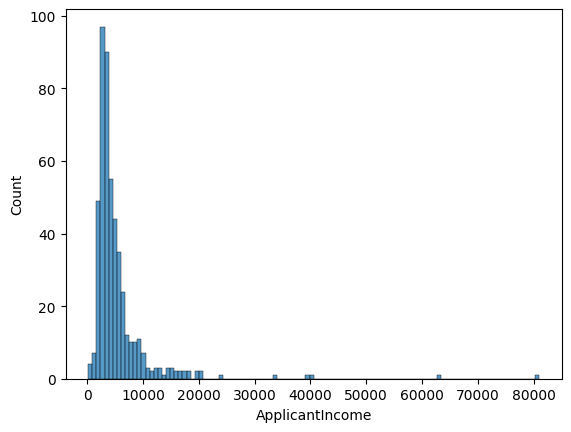

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

Al parecer contiene datos atipicos

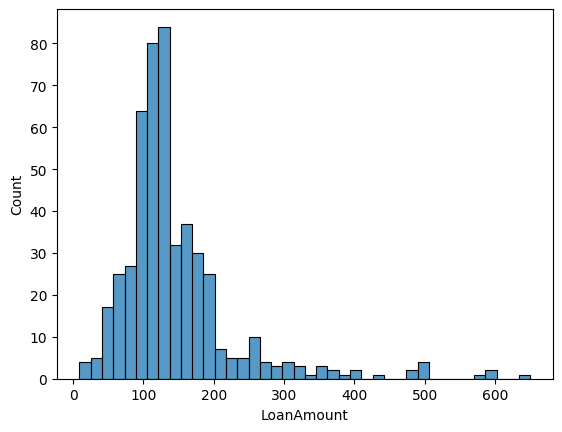

In [101]:
sns.histplot(data = X_train_num_imputed, x = 'LoanAmount')
plt.show()

In [102]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.749491,5358.511202,1670.942811,145.596741,342.109980,0.855397
std,1.020391,6069.036190,3155.227516,85.049111,64.015911,0.352059
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
1%,0.000000,1022.500000,0.000000,29.600000,84.000000,0.000000
2.5%,0.000000,1696.500000,0.000000,45.250000,180.000000,0.000000
5%,0.000000,1893.500000,0.000000,56.000000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,71.000000,300.000000,0.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,1.000000,5790.000000,2333.000000,164.500000,360.000000,1.000000


En la variable ApplicantIncome, se nota que el percentil 1 (1%) dista bastante con el valor minimo(min) , 150 a 1022

In [103]:
#hacemos una lista de todos por percentiles que deseamos observar
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.749491,5358.511202,1670.942811,145.596741,342.109980,0.855397
std,1.020391,6069.036190,3155.227516,85.049111,64.015911,0.352059
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,1.000000,5790.000000,2333.000000,164.500000,360.000000,1.000000
90%,2.000000,9323.000000,3796.000000,230.000000,360.000000,1.000000
95%,3.000000,13456.000000,4998.000000,306.000000,360.000000,1.000000
97.5%,3.000000,17440.750000,7149.750000,395.000000,360.000000,1.000000
99%,3.000000,24807.300000,11001.200000,496.400000,480.000000,1.000000


En la variable ApplicantIncome se muestra que el percentil 99 (99%) al valor maximo (max), existe un salto grande

**Variable `ApplicantIncome`**

In [104]:
import numpy as np

p1 = np.percentile(X_train_num_imputed['ApplicantIncome'], 1) #percentil 1
p99 = np.percentile(X_train_num_imputed['ApplicantIncome'], 99) #percentil 99

In [105]:
p1, p99

(1022.5, 24807.30000000023)

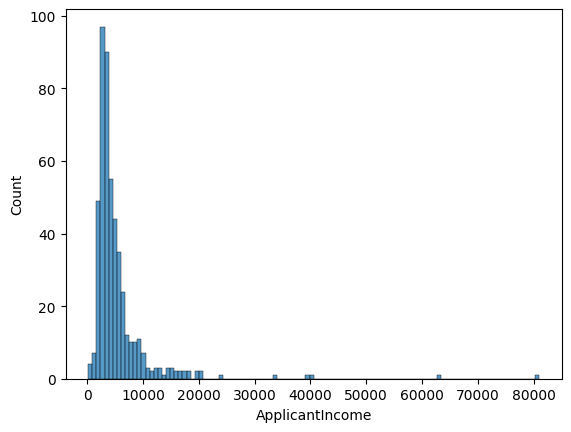

In [106]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

`np.clip` limita los bordes del intervalo a unos valores dados

In [107]:
X_train_num_imputed['ApplicantIncome'] = np.clip(X_train_num_imputed['ApplicantIncome'], p1, p99)
X_train_num_imputed['ApplicantIncome']

0      3463.0
1      1800.0
2      2895.0
3      5849.0
4      2927.0
        ...  
486    6045.0
487    4625.0
488    2708.0
489    3244.0
490    3748.0
Name: ApplicantIncome, Length: 491, dtype: float64

En este caso en particular se va a limitar la variable, esta funcion clip, se encarga de reemplazar todos los valore inferiores a p1 (1022) por p1 y todos los valores superiores a p2(24807) por p2

Veamos los cambios en la distribución:

In [108]:
X_train_num_imputed.describe(percentiles = [0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.749491,5092.462322,1670.942811,145.596741,342.109980,0.855397
std,1.020391,3949.551299,3155.227516,85.049111,64.015911,0.352059
min,0.000000,1022.500000,0.000000,9.000000,12.000000,0.000000
50%,0.000000,3814.000000,1250.000000,126.000000,360.000000,1.000000
75%,1.000000,5790.000000,2333.000000,164.500000,360.000000,1.000000
90%,2.000000,9323.000000,3796.000000,230.000000,360.000000,1.000000
95%,3.000000,13456.000000,4998.000000,306.000000,360.000000,1.000000
97.5%,3.000000,17440.750000,7149.750000,395.000000,360.000000,1.000000
99%,3.000000,23903.430000,11001.200000,496.400000,480.000000,1.000000


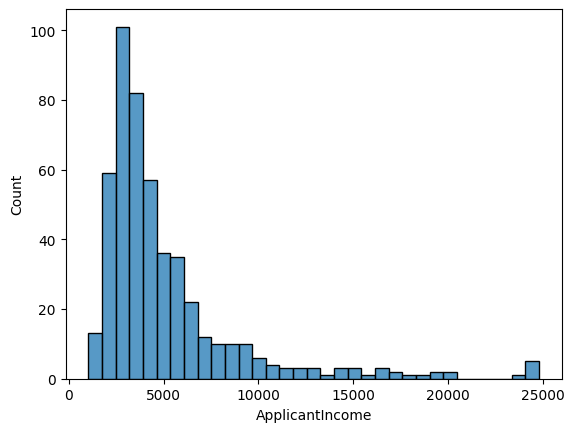

In [109]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

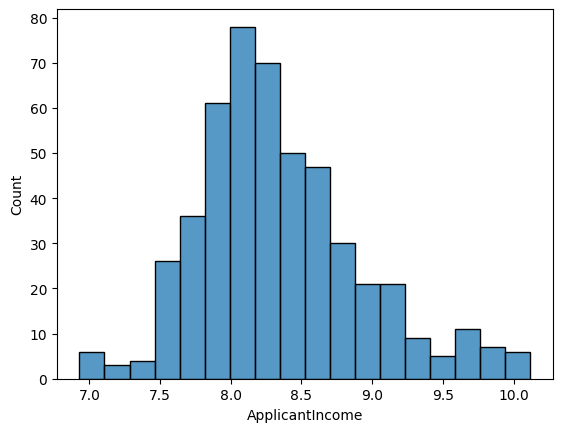

In [110]:
# aplicación de la transformada logaritmo (para normalizar variables)
# para poder reducir los valores de una variable con valores muy grandes
sns.histplot(np.log(X_train_num_imputed['ApplicantIncome']))
plt.show()

### 8. Consolidación

In [111]:
X_train_cat_dummies.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,False,False,False,True,False,True
1,True,True,True,False,False,True
2,True,True,False,True,True,False
3,True,False,False,False,False,True
4,True,False,True,False,True,False


In [112]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3463.0,0.0,122.0,360.0,1.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0
2,1.0,2895.0,0.0,95.0,360.0,1.0
3,0.0,5849.0,0.0,126.0,360.0,1.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0


In [113]:
X_train_cat_dummies.shape

(491, 6)

In [114]:
X_train_num_imputed.shape

(491, 6)

`pd.concat` nos permite concatenar las bases anteriormente revisadas:

In [115]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 0) 
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3463.0,0.0,122.0,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1800.0,2934.0,93.0,360.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2895.0,0.0,95.0,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,5849.0,0.0,126.0,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2927.0,2405.0,111.0,360.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
X_train_total.shape

(982, 12)

In [117]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1) 
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False


In [118]:
X_train_total.shape

(491, 12)

la funcion concat nos permite unir dos dataframes, axis = 1, nos indica que el modo de unir es mediante columnas y 0 mediante filas

Hagamos una última verificación de nulos

In [119]:
X_train_total.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

### 9. Creación de nuevas variables

<img src = 'https://i.pinimg.com/originals/89/0f/92/890f92f1dba99065531aa2bc1b6b9c45.jpg'>

In [120]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False


In [121]:
X_train_total['TotalIncome'] = X_train_total['ApplicantIncome'] + X_train_total['CoapplicantIncome']

Se va a generar una nueva variable de ingreso total "TotalIncome" sumando las variables ya existentes ApplicantIncome, CoapplicantIncome

In [122]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True,3463.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True,4734.0
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False,2895.0
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True,5849.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False,5332.0


In [123]:
X_train_total['TotalIncomeByPerson'] = X_train_total['TotalIncome'] / (X_train_total['Dependents'] + 1)

Creando la variable total de ingreso por persona que se tiene dividiento TotalIncome/(Dependents+1), mas 1 debido a que se considera tambien la persona

In [124]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True,3463.0,3463.0
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True,4734.0,4734.0
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False,2895.0,1447.5
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True,5849.0,5849.0
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False,5332.0,5332.0


In [125]:
X_train_total['Cuota'] = X_train_total['LoanAmount'] * 1000 / X_train_total['Loan_Amount_Term']
X_train_total['%Cuota'] = X_train_total['Cuota'] / X_train_total['TotalIncome']  # nivel de endeudamiento

In [126]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True,3463.0,3463.0,338.888889,0.097860
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True,4734.0,4734.0,258.333333,0.054570
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False,2895.0,1447.5,263.888889,0.091153
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True,5849.0,5849.0,350.000000,0.059839
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False,5332.0,5332.0,308.333333,0.057827


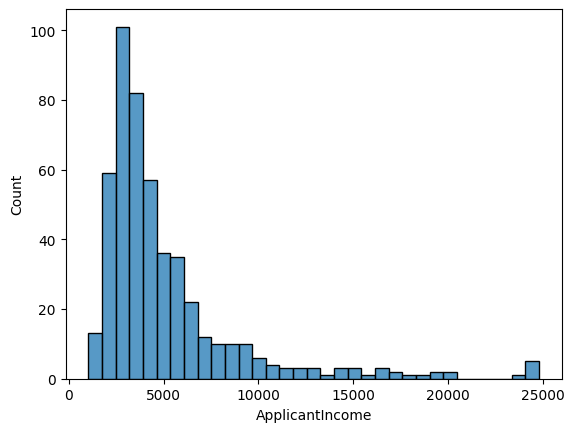

In [127]:
sns.histplot(data = X_train_total, x = 'ApplicantIncome')
plt.show()

la imagen tiene asimetria, para tratar de obtener una distribucion que se asemeje a una distribución normal usamos el logaritmo

In [128]:
X_train_total['log_ApplicantIncome'] = np.log(X_train_total['ApplicantIncome'])
X_train_total['log_TotalIncome'] = np.log(X_train_total['TotalIncome'])

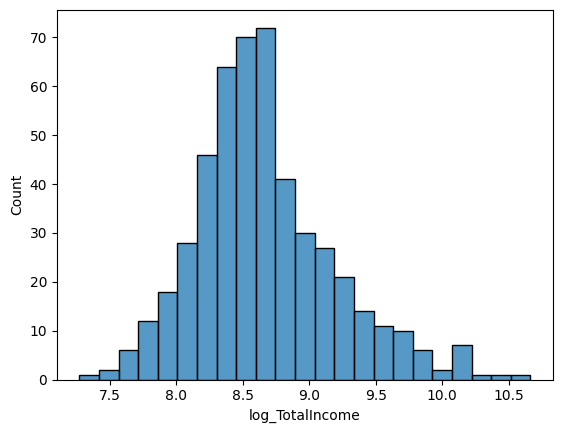

In [129]:
sns.histplot(data = X_train_total, x = 'log_TotalIncome')
plt.show()

In [130]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.0,3463.0,0.0,122.0,360.0,1.0,False,False,False,True,False,True,3463.0,3463.0,338.888889,0.097860,8.149891,8.149891
1,0.0,1800.0,2934.0,93.0,360.0,0.0,True,True,True,False,False,True,4734.0,4734.0,258.333333,0.054570,7.495542,8.462526
2,1.0,2895.0,0.0,95.0,360.0,1.0,True,True,False,True,True,False,2895.0,1447.5,263.888889,0.091153,7.970740,7.970740
3,0.0,5849.0,0.0,126.0,360.0,1.0,True,False,False,False,False,True,5849.0,5849.0,350.000000,0.059839,8.674026,8.674026
4,0.0,2927.0,2405.0,111.0,360.0,1.0,True,False,True,False,True,False,5332.0,5332.0,308.333333,0.057827,7.981733,8.581482


### 10.Estandarización

Esto es importante para variables con diferencias en escala, y siempre tiene que aplicarse en ML no supervisado

In [131]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [132]:
X_scaled = scaler.fit_transform(X_train_total) #todas las variables estan de 0 a 1

In [133]:
columnas = X_train_total.columns
columnas

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'],
      dtype='object')

In [134]:
X_train_scaled = pd.DataFrame(data = X_scaled, columns = columnas)

X_train_scaled

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.048997,0.085346,0.034026,0.073871,0.382542,0.258596
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.079811,0.121438,0.025294,0.038672,0.177346,0.350876
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.035226,0.028113,0.025896,0.068418,0.326363,0.205717
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.106843,0.153100,0.035230,0.042957,0.546906,0.413303
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.094309,0.138419,0.030714,0.041321,0.329810,0.385987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.000000,0.211164,0.000000,0.165367,0.74359,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.111595,0.158666,0.031918,0.037269,0.557242,0.423032
487,0.000000,0.151462,0.068567,0.159126,0.00000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.146433,0.199472,1.000000,0.999534,0.473277,0.485982
488,0.666667,0.070865,0.028008,0.137285,0.74359,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.058985,0.023687,0.026498,0.050840,0.305423,0.291776
489,0.000000,0.093400,0.000000,0.110764,0.74359,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.043687,0.079127,0.021379,0.050001,0.362056,0.239314


Comparación de distribuciones

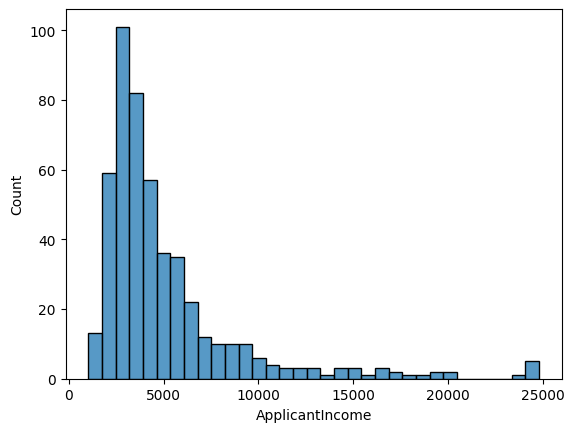

In [135]:
sns.histplot(X_train_total['ApplicantIncome'])
plt.show()

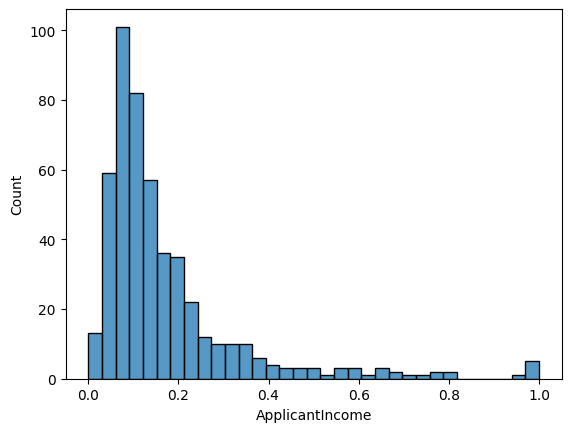

In [136]:
sns.histplot(X_train_scaled['ApplicantIncome'])
plt.show()

## Repetir todo el preprocesamiento para el conjunto de validación

In [137]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban
1,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural
2,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban
3,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
4,Male,Yes,2,Graduate,No,8000,0.0,200.0,360.0,1.0,Semiurban


In [138]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             122 non-null    object 
 1   Married            122 non-null    object 
 2   Dependents         120 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      115 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         114 non-null    float64
 8   Loan_Amount_Term   121 non-null    float64
 9   Credit_History     111 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.7+ KB


Variable de dependientes

In [139]:
X_test['Dependents'] = X_test['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

Imputación de nulos

In [140]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

Numéricas

In [141]:
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,3500.0,1667.0,114.0,360.0,1.0
1,2.0,2309.0,1255.0,125.0,360.0,0.0
2,0.0,2237.0,0.0,63.0,480.0,0.0
3,0.0,1025.0,5500.0,216.0,360.0,1.0
4,2.0,8000.0,0.0,200.0,360.0,1.0


Categóricas

In [142]:
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Graduate,No,Semiurban
1,Male,Yes,Not Graduate,No,Rural
2,Male,No,Graduate,No,Semiurban
3,Male,Yes,Graduate,No,Rural
4,Male,Yes,Graduate,No,Semiurban


Encoding

In [143]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Capeo de valores atípicos (con los obtenidos del train)

In [144]:
X_test_num_imputed['ApplicantIncome'] = np.clip(X_test_num_imputed['ApplicantIncome'], p1, p99)

Consolidación

In [145]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [146]:
X_test_total['TotalIncome'] = X_test_total['ApplicantIncome'] + X_test_total['CoapplicantIncome']
X_test_total['TotalIncomeByPerson'] = X_test_total['TotalIncome'] / (X_test_total['Dependents'] + 1)
X_test_total['Cuota'] = X_test_total['LoanAmount']*1000 / X_test_total['Loan_Amount_Term']
X_test_total['%Cuota'] = X_test_total['Cuota'] / X_test_total['TotalIncome']

In [147]:
X_test_total['log_ApplicantIncome'] = np.log(X_test_total['ApplicantIncome'])
X_test_total['log_TotalIncome'] = np.log(X_test_total['TotalIncome'])

In [148]:
X_test_scaled = pd.DataFrame(data = scaler.fit_transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas

In [149]:
X_train_scaled.shape

(491, 18)

In [150]:
X_test_scaled.shape

(123, 18)

Guardamos ambos datasets preprocesados

In [151]:
target = 'Loan_Status'

X_train_export = X_train_scaled.copy()
X_train_export[target] = y_train.values

X_test_export = X_test_scaled.copy()
X_test_export[target] = y_test.values

In [152]:
X_train_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.048997,0.085346,0.034026,0.073871,0.382542,0.258596,0
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.079811,0.121438,0.025294,0.038672,0.177346,0.350876,1
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.035226,0.028113,0.025896,0.068418,0.326363,0.205717,0
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.106843,0.153100,0.035230,0.042957,0.546906,0.413303,0
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.094309,0.138419,0.030714,0.041321,0.329810,0.385987,0


In [153]:
X_test_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.104163,0.185635,0.125373,0.714286,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.124196,0.152834,0.093333,0.157741,0.385875,0.362126,0
1,0.666667,0.054089,0.139755,0.141791,0.714286,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.061333,0.001897,0.105556,0.286272,0.255438,0.220423,1
2,0.000000,0.051062,0.000000,0.049254,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.009294,0.041689,0.019167,0.148444,0.245504,0.042727,1
3,0.000000,0.000105,0.612472,0.277612,0.714286,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.177451,0.204347,0.206667,0.266815,0.000766,0.451155,0
4,0.666667,0.293360,0.000000,0.253731,0.714286,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.235294,0.057988,0.188889,0.186756,0.645112,0.528910,0


In [154]:
X_train_export.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed.csv', index = False)
X_test_export.to_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\test_preprocesed.csv', index = False)

Cargamos de nuevo las bases para continuar:

In [155]:
import pandas as pd
import numpy as np

X_train_export = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\train_preprocesed.csv')
X_test_export = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Programa Data Science for Business\codigo\save\test_preprocesed.csv')

target = 'Loan_Status'

Separando la data de las variables independientes y la variable target

In [156]:
X_train_scaled = X_train_export.drop(target, axis = 1)  # para borrar columnas
y_train = X_train_export[target]

In [157]:
X_test_scaled = X_test_export.drop(target, axis = 1)  # para borrar columnas
y_test = X_test_export[target]

In [158]:
X_train_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.000000,0.102608,0.000000,0.176287,0.74359,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.048997,0.085346,0.034026,0.073871,0.382542,0.258596
1,0.000000,0.032689,0.070415,0.131045,0.74359,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.079811,0.121438,0.025294,0.038672,0.177346,0.350876
2,0.333333,0.078727,0.000000,0.134165,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.035226,0.028113,0.025896,0.068418,0.326363,0.205717
3,0.000000,0.202924,0.000000,0.182527,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.106843,0.153100,0.035230,0.042957,0.546906,0.413303
4,0.000000,0.080072,0.057720,0.159126,0.74359,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.094309,0.138419,0.030714,0.041321,0.329810,0.385987


In [159]:
X_test_scaled.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.000000,0.104163,0.185635,0.125373,0.714286,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.124196,0.152834,0.093333,0.157741,0.385875,0.362126
1,0.666667,0.054089,0.139755,0.141791,0.714286,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.061333,0.001897,0.105556,0.286272,0.255438,0.220423
2,0.000000,0.051062,0.000000,0.049254,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.009294,0.041689,0.019167,0.148444,0.245504,0.042727
3,0.000000,0.000105,0.612472,0.277612,0.714286,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.177451,0.204347,0.206667,0.266815,0.000766,0.451155
4,0.666667,0.293360,0.000000,0.253731,0.714286,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.235294,0.057988,0.188889,0.186756,0.645112,0.528910
